# Image Classification Using CNN models

In [1]:
# Importing the libraries

import numpy as np
from keras import models, layers, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Loading the Cifar10 dataset

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Normalization of Data

x_train = x_train / 255
x_test = x_test / 255

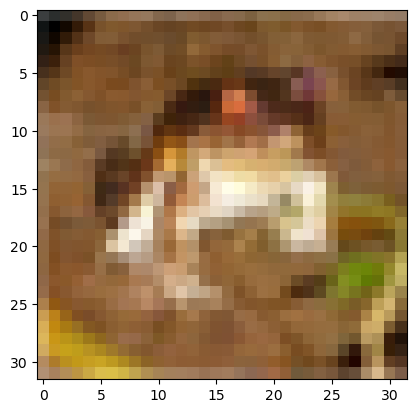

In [7]:
# sample image

plt.imshow(x_train[0])

In [8]:
# different classes in cifar10 dataset

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
y_train[100]

array([8], dtype=uint8)

In [10]:
# rehsphaping the output data as 1D array

y_train = np.reshape(y_train, (-1,))
y_test = np.reshape(y_test, (-1,))

In [11]:
y_train[100]

8

In [12]:
# defining a function to plot images using matplotlib

def plot_show(x, y, index):
    plt.figure(figsize = (15,2))
    plt.xlabel(classes[y[index]])
    plt.imshow(x[index])

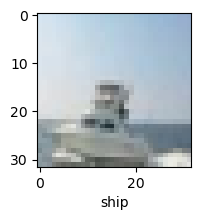

In [13]:
plot_show(x_train, y_train, 100)

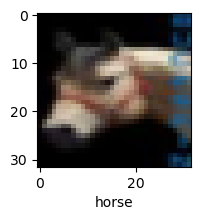

In [14]:
plot_show(x_test, y_test, 57)

In [15]:
# creating an ANN model using 3 dense layers

ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1500, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8916 - accuracy: 0.3244
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6741 - accuracy: 0.3980
Epoch 3/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6057 - accuracy: 0.4215
Epoch 4/5
1563/1563 [==============================] - 35s 23ms/step - loss: 1.5581 - accuracy: 0.4423
Epoch 5/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5181 - accuracy: 0.4553


In [16]:
# predicting using the ANN model for x_test

y_pred = ann.predict(x_test)
y_pred

313/313 [==============================] - 2s 6ms/step


array([[0.05480637, 0.39232132, 0.22197567, ..., 0.13917017, 0.5873982 ,
        0.07957273],
       [0.7966764 , 0.9686544 , 0.19504458, ..., 0.01574706, 0.9766298 ,
        0.9704723 ],
       [0.9035548 , 0.7810096 , 0.22371806, ..., 0.05936535, 0.98909134,
        0.76960546],
       ...,
       [0.02824141, 0.02107796, 0.646182  , ..., 0.23013411, 0.17190057,
        0.03469577],
       [0.40873826, 0.16161318, 0.44386533, ..., 0.36577395, 0.08048606,
        0.28315553],
       [0.43923908, 0.22872742, 0.6197893 , ..., 0.8296988 , 0.13600186,
        0.09072836]], dtype=float32)

In [17]:
y_pred = [np.argmax(element) for element in y_pred]
y_pred

[3,
 8,
 8,
 8,
 4,
 6,
 3,
 4,
 4,
 1,
 8,
 9,
 6,
 0,
 1,
 8,
 3,
 4,
 8,
 7,
 5,
 0,
 2,
 9,
 7,
 6,
 4,
 0,
 1,
 6,
 6,
 4,
 8,
 5,
 9,
 1,
 6,
 9,
 9,
 8,
 0,
 6,
 3,
 4,
 0,
 9,
 6,
 8,
 4,
 6,
 9,
 4,
 6,
 3,
 8,
 8,
 7,
 8,
 8,
 2,
 7,
 3,
 7,
 9,
 6,
 2,
 1,
 0,
 5,
 9,
 4,
 7,
 8,
 8,
 9,
 4,
 9,
 3,
 3,
 1,
 8,
 1,
 1,
 0,
 2,
 7,
 2,
 8,
 8,
 9,
 0,
 4,
 8,
 6,
 7,
 3,
 6,
 0,
 2,
 7,
 4,
 4,
 3,
 3,
 1,
 1,
 3,
 6,
 8,
 5,
 6,
 0,
 6,
 2,
 9,
 3,
 0,
 8,
 7,
 5,
 8,
 4,
 1,
 2,
 0,
 1,
 8,
 5,
 4,
 0,
 7,
 1,
 1,
 1,
 1,
 1,
 9,
 7,
 6,
 8,
 4,
 0,
 9,
 5,
 8,
 2,
 3,
 5,
 5,
 3,
 8,
 3,
 8,
 8,
 0,
 5,
 2,
 8,
 5,
 0,
 2,
 1,
 5,
 6,
 9,
 7,
 8,
 6,
 7,
 9,
 9,
 7,
 1,
 8,
 9,
 9,
 8,
 6,
 3,
 0,
 1,
 7,
 6,
 0,
 7,
 8,
 6,
 3,
 7,
 8,
 6,
 9,
 4,
 1,
 7,
 4,
 8,
 8,
 3,
 8,
 3,
 8,
 8,
 2,
 1,
 5,
 8,
 5,
 7,
 8,
 6,
 1,
 1,
 7,
 9,
 0,
 8,
 9,
 0,
 7,
 2,
 4,
 8,
 2,
 3,
 9,
 3,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 8,
 0,
 4,
 0,
 6,
 6,
 1,
 1,
 7,
 8,
 0,
 7,
 7,
 8,
 2,
 1,


In [18]:
# Classification report of the output data

print('Classification Report: \n\n', classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1000
           1       0.44      0.72      0.55      1000
           2       0.36      0.27      0.31      1000
           3       0.36      0.28      0.32      1000
           4       0.39      0.33      0.36      1000
           5       0.40      0.30      0.34      1000
           6       0.45      0.56      0.50      1000
           7       0.53      0.46      0.49      1000
           8       0.50      0.68      0.58      1000
           9       0.51      0.40      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



In [19]:
# creating and training the first CNN model, 2 convolutinal and pooling layers

cnn = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3411 - accuracy: 0.5223
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9597 - accuracy: 0.6657
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7684 - accuracy: 0.7328
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5999 - accuracy: 0.7917
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4396 - accuracy: 0.8482
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2957 - accuracy: 0.8985
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1880 - accuracy: 0.9373
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1380 - accuracy: 0.9540
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1024 - accuracy: 0.9661
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [20]:
y_pred = cnn.predict(x_test)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[1.44924899e-08, 1.51123969e-09, 5.12127190e-05, ...,
        7.03555042e-06, 4.19576145e-06, 1.11772355e-10],
       [1.69545913e-07, 2.75412917e-01, 6.03924809e-12, ...,
        1.18809728e-11, 7.24543869e-01, 4.29849060e-05],
       [3.19130206e-03, 2.97777690e-02, 2.39652247e-04, ...,
        6.07838456e-06, 9.18586791e-01, 4.59782928e-02],
       ...,
       [2.70334997e-13, 2.52377619e-10, 1.57596216e-01, ...,
        3.04031011e-04, 4.01351587e-13, 1.03000799e-08],
       [1.24377513e-03, 9.48674738e-01, 3.23490283e-08, ...,
        1.61413914e-06, 2.53912114e-10, 1.30458672e-10],
       [2.39780247e-15, 8.32932827e-18, 6.40834608e-13, ...,
        9.99999046e-01, 1.23423537e-12, 7.20957091e-15]], dtype=float32)

In [21]:
y_pred = [np.argmax(element) for element in y_pred]
y_pred

[3,
 8,
 8,
 0,
 4,
 6,
 1,
 2,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 0,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 7,
 3,
 5,
 6,
 7,
 3,
 6,
 0,
 6,
 2,
 1,
 2,
 5,
 9,
 2,
 9,
 8,
 8,
 7,
 2,
 7,
 5,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 4,
 5,
 8,
 1,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 3,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 5,
 7,
 6,
 0,
 6,
 2,
 0,
 4,
 0,
 4,
 6,
 5,
 8,
 7,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 2,
 4,
 1,
 8,
 1,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 3,
 8,
 7,
 6,
 3,
 7,
 2,
 8,
 9,
 6,
 3,
 0,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 2,
 6,
 0,
 7,
 8,
 6,
 5,
 0,
 9,
 9,
 2,
 2,
 9,
 9,
 3,
 7,
 3,
 9,
 0,
 5,
 2,
 3,
 5,
 8,
 6,
 3,
 3,
 8,
 2,
 1,
 7,
 1,
 7,
 3,
 8,
 8,
 7,
 3,
 3,
 9,
 8,
 7,
 1,
 4,
 0,
 5,
 7,
 9,
 2,
 0,
 5,
 9,
 8,
 4,
 6,
 9,
 0,
 2,
 7,
 6,
 9,
 7,
 3,
 9,
 9,
 4,
 3,
 3,
 5,
 1,
 5,
 1,
 8,
 0,
 4,
 7,
 3,
 3,
 1,
 1,
 1,
 9,
 0,
 6,
 1,
 8,
 2,
 0,


In [22]:
print('Classification Report: \n\n', classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.77      0.85      0.81      1000
           2       0.62      0.60      0.61      1000
           3       0.50      0.58      0.53      1000
           4       0.69      0.62      0.65      1000
           5       0.61      0.58      0.60      1000
           6       0.78      0.77      0.77      1000
           7       0.77      0.74      0.76      1000
           8       0.80      0.80      0.80      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [23]:
# creating and training the second CNN model, 2 convolutinal and pooling layers

cnn = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.3525 - accuracy: 0.5125
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9229 - accuracy: 0.6768
Epoch 3/5
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6730 - accuracy: 0.7648
Epoch 4/5
1563/1563 [==============================] - 60s 39ms/step - loss: 0.4462 - accuracy: 0.8438
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.2570 - accuracy: 0.9109


In [24]:
# classification report

y_pred = cnn.predict(x_test)
y_pred = [np.argmax(element) for element in y_pred]
print('Classification Report: \n\n', classification_report(y_test, y_pred))

313/313 [==============================] - 3s 9ms/step
Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.79      0.85      0.82      1000
           2       0.69      0.57      0.62      1000
           3       0.51      0.56      0.53      1000
           4       0.65      0.67      0.66      1000
           5       0.65      0.56      0.60      1000
           6       0.81      0.76      0.78      1000
           7       0.75      0.82      0.78      1000
           8       0.77      0.85      0.81      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [25]:
# creating and training the third CNN model, 2 convolutinal and pooling layers, padding is provided

cnn = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3117 - accuracy: 0.5263
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8818 - accuracy: 0.6899
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6325 - accuracy: 0.7795
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.4089 - accuracy: 0.8586
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.2308 - accuracy: 0.9190
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.1496 - accuracy: 0.9492
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.1197 - accuracy: 0.9597
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.0946 - accuracy: 0.9689
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.0905 - accuracy: 0.9705
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [26]:
# creating and training the third CNN model, 2 convolutinal and pooling layers

y_pred = cnn.predict(x_test)
y_pred = [np.argmax(element) for element in y_pred]
print('Classification Report: \n\n', classification_report(y_test, y_pred))

313/313 [==============================] - 3s 9ms/step
Classification Report: 

               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.84      0.82      0.83      1000
           2       0.70      0.51      0.59      1000
           3       0.53      0.47      0.50      1000
           4       0.63      0.73      0.68      1000
           5       0.57      0.66      0.61      1000
           6       0.73      0.82      0.77      1000
           7       0.80      0.76      0.78      1000
           8       0.82      0.82      0.82      1000
           9       0.78      0.79      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [27]:
# creating and training the fouth CNN model, 3 convolutinal and pooling layers, padding is provided

cnn = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(1500, activation = 'relu'),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3744 - accuracy: 0.4980
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9484 - accuracy: 0.6660
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7596 - accuracy: 0.7336
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6255 - accuracy: 0.7791
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4987 - accuracy: 0.8251
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.3833 - accuracy: 0.8654
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.2899 - accuracy: 0.8967
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.2173 - accuracy: 0.9237
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.1811 - accuracy: 0.9374
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [28]:
# Classification Report

y_pred = cnn.predict(x_test)
y_pred = [np.argmax(element) for element in y_pred]
print('Classification Report: \n\n', classification_report(y_test, y_pred))

313/313 [==============================] - 2s 7ms/step
Classification Report: 

               precision    recall  f1-score   support

           0       0.71      0.82      0.76      1000
           1       0.87      0.83      0.85      1000
           2       0.65      0.61      0.63      1000
           3       0.56      0.51      0.53      1000
           4       0.62      0.74      0.67      1000
           5       0.67      0.56      0.61      1000
           6       0.79      0.80      0.79      1000
           7       0.74      0.78      0.76      1000
           8       0.87      0.81      0.84      1000
           9       0.79      0.81      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000

